In [7]:
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization


num_classes = 100

# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## 클래스가 10개인 Multi class classification



In [8]:
# 흑백이 아닌 컬러 이미지라서 channel = 3임
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 100) (10000, 32, 32, 3) (10000, 100)


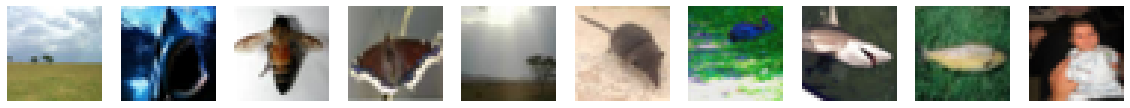

In [9]:
sample_size = 10

idx_s = np.random.randint(0,len(x_train), sample_size)
fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 2, 2))

for i in range(sample_size):
    ax[i].set_axis_off()
    ax[i].imshow(np.reshape(x_train[idx_s][i], [32, 32, 3]))

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add( BatchNormalization())
model.add(Conv2D(32,(3, 3), padding='same', activation='relu'))
model.add( BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add( BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add( BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add( BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add( BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



In [11]:
batch_size = 128
epochs = 35

train_model=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/35
35000/35000 [==============================] - 22s 617us/step - loss: 4.5949 - acc: 0.0180 - val_loss: 4.2134 - val_acc: 0.0481
Epoch 2/35
35000/35000 [==============================] - 17s 475us/step - loss: 4.2829 - acc: 0.0449 - val_loss: 4.0213 - val_acc: 0.0757
Epoch 3/35
35000/35000 [==============================] - 17s 475us/step - loss: 4.0382 - acc: 0.0744 - val_loss: 3.7649 - val_acc: 0.1133
Epoch 4/35
35000/35000 [==============================] - 17s 474us/step - loss: 3.8227 - acc: 0.1051 - val_loss: 3.4236 - val_acc: 0.1771
Epoch 5/35
35000/35000 [==============================] - 17s 476us/step - loss: 3.6137 - acc: 0.1401 - val_loss: 3.3833 - val_acc: 0.1883
Epoch 6/35
35000/35000 [==============================] - 17s 476us/step - loss: 3.3849 - acc: 0.1839 - val_loss: 3.0304 - val_acc: 0.2533
Epoch 7/35
35000/35000 [==============================] - 17s 475us/step - loss: 3.2030 - acc: 0.2122 - val_loss: 2.

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7177765508651734
Test accuracy: 0.5379


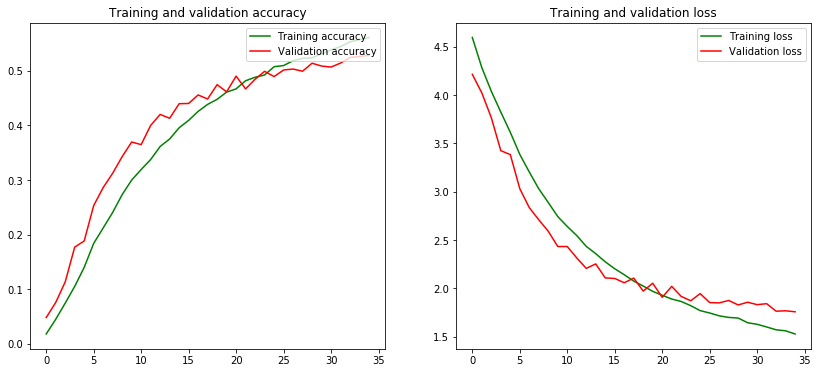

In [13]:
def plot_result(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    fig, ax = plt.subplots(1,2, figsize=(14,6))
    
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend(loc=1)
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend(loc=1)
    plt.show()
    
plot_result(train_model)